In [19]:
# ----------------------------
# 1. Import Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for prettier plots
sns.set_style("whitegrid")


In [20]:
# ----------------------------
# 2. Load Cleaned Data
# ----------------------------
enrol = pd.read_csv(
    "C:/Users/Pragya/Desktop/uidai-hackathon/aadhaar-enrollment/data/processed/enrol_cleaned.csv"
)

demo = pd.read_csv(
    "C:/Users/Pragya/Desktop/uidai-hackathon/aadhaar-enrollment/data/processed/demo_cleaned.csv"
)

print("Enrollment dataset shape:", enrol.shape)
print("Demographic dataset shape:", demo.shape)


Enrollment dataset shape: (8037, 7)
Demographic dataset shape: (13601, 6)


In [21]:
# ----------------------------
# Create total enrollment column
# ----------------------------
enrol['total_enrolment'] = (
    enrol['age_0_5'] +
    enrol['age_5_17'] +
    enrol['age_18_greater']
)

print(enrol[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].head())


   age_0_5  age_5_17  age_18_greater  total_enrolment
0        3         0               0                3
1        1         0               0                1
2        1         1               0                2
3        1         0               0                1
4        1         0               0                1


In [22]:
# ----------------------------
# 3. Quick Overview of Enrollment Data
# ----------------------------
print("\nEnrollment dataset info:")
print(enrol.info())

print("\nEnrollment dataset summary statistics:")
print(enrol.describe())

print("\nSample rows:")
print(enrol.head())



Enrollment dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2851 non-null   object
 1   state            8037 non-null   object
 2   district         8037 non-null   object
 3   pincode          8037 non-null   int64 
 4   age_0_5          8037 non-null   int64 
 5   age_5_17         8037 non-null   int64 
 6   age_18_greater   8037 non-null   int64 
 7   total_enrolment  8037 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 502.4+ KB
None

Enrollment dataset summary statistics:
             pincode      age_0_5     age_5_17  age_18_greater  \
count    8037.000000  8037.000000  8037.000000     8037.000000   
mean   411579.216374     3.473435     1.117208        0.155655   
std       836.826361    10.779462     4.955772        1.085235   
min    402301.000000     0.000000     0.000000        0.0

In [23]:
# Check actual column names in enrollment dataset
print(enrol.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrolment'],
      dtype='object')


In [24]:
# ----------------------------
# 4. Identify Enrollment Gaps
# ----------------------------

# State-wise total enrollment
state_enrol = (
    enrol
    .groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
)

print("\nTotal enrollment per state:")
print(state_enrol)




Total enrollment per state:
state
Maharashtra    38146
Name: total_enrolment, dtype: int64


In [25]:
# ----------------------------
# Age group enrollment gaps
# ----------------------------

age_totals = enrol[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

print("\nTotal enrollment by age group:")
print(age_totals)

age_percentage = (age_totals / age_totals.sum()) * 100
print("\nAge group percentage distribution:")
print(age_percentage)



Total enrollment by age group:
age_0_5           27916
age_5_17           8979
age_18_greater     1251
dtype: int64

Age group percentage distribution:
age_0_5           73.181985
age_5_17          23.538510
age_18_greater     3.279505
dtype: float64


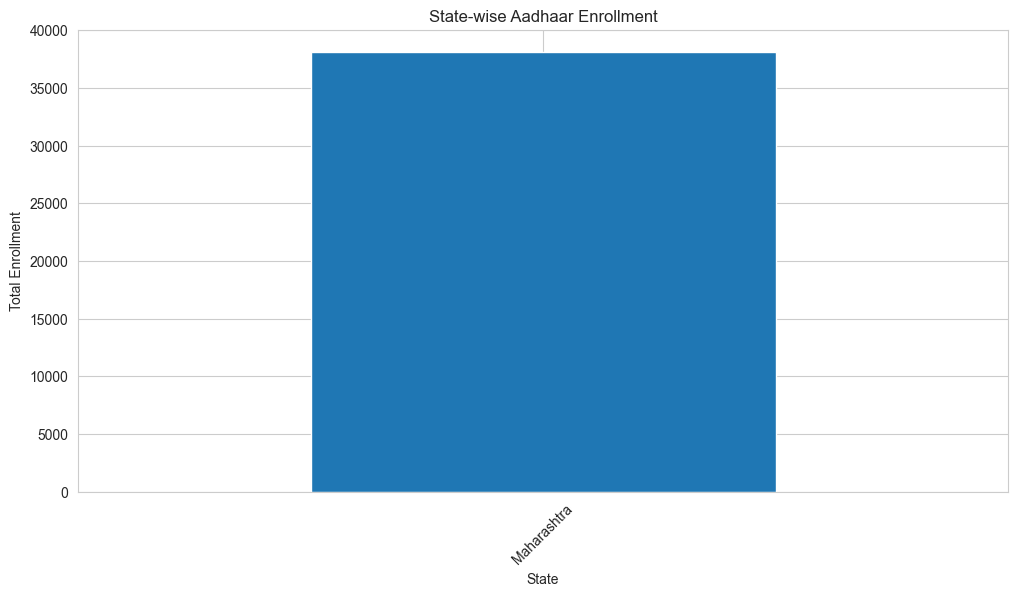

In [26]:
# ----------------------------
# Visualize State-wise Enrollment Gap
# ----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
state_enrol.plot(kind='bar')
plt.title("State-wise Aadhaar Enrollment")
plt.ylabel("Total Enrollment")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()


In [27]:
# ----------------------------
# 6. Identify Enrollment Gaps / Insights
# ----------------------------

# States with below-average enrollment
low_enrol_states = state_enrol[state_enrol < state_enrol.mean()]

print("\nStates with below-average enrollment:")
print(low_enrol_states)

# Age group gap analysis
age_totals = enrol[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

print("\nTotal enrollment by age group:")
print(age_totals)

age_percentage = (age_totals / age_totals.sum()) * 100
print("\nAge group percentage distribution:")
print(age_percentage)



States with below-average enrollment:
Series([], Name: total_enrolment, dtype: int64)

Total enrollment by age group:
age_0_5           27916
age_5_17           8979
age_18_greater     1251
dtype: int64

Age group percentage distribution:
age_0_5           73.181985
age_5_17          23.538510
age_18_greater     3.279505
dtype: float64
